# 딥러닝 프로젝트

## 1. Boston 주택 가격 예측 모델

데이터셋: 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있다.

### 1.1 데이터 로드 및 전처리

데이터를 불러와 확인해 보고 전처리한다.  
데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용한다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# keras.datasets의 boston_housing 데이터셋 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋 크기 확인
print(len(train_data))
print(len(test_data))

404
102


In [36]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

In [37]:
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# train_data의 평균과 표준편차 사용
test_data = test_data - mean
test_data = test_data / std

<br>
<br>

### 1.2 모델 구성 및 컴파일

주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일한다.  
Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성한다.

In [38]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers, callbacks, optimizers

# 모델 구성
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,633 (22.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [39]:
# 모델 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

<br>
<br>

### 1.3 모델 학습

In [40]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
check_point_cb = callbacks.ModelCheckpoint('boston_best_model.h5',
                                           save_best_only=True,
                                           monitor='val_loss')

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[check_point_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 620.5698 - mae: 23.0824

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 619.5693 - mae: 23.0671 - val_loss: 646.0970 - val_mae: 23.7275
Epoch 2/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - loss: 628.0583 - mae: 22.6908

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 599.9525 - mae: 22.6563 - val_loss: 638.1328 - val_mae: 23.6135
Epoch 3/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 585.6051 - mae: 22.3570

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 571.8713 - mae: 22.2440 - val_loss: 629.7294 - val_mae: 23.4847
Epoch 4/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 498.1966 - mae: 21.2595

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 545.2101 - mae: 21.8794 - val_loss: 619.7050 - val_mae: 23.3120
Epoch 5/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 675.9185 - mae: 24.6019

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 540.7163 - mae: 21.7405 - val_loss: 608.2280 - val_mae: 23.1030
Epoch 6/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 429.7149 - mae: 18.9962

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 489.7075 - mae: 20.4875 - val_loss: 595.7401 - val_mae: 22.8762
Epoch 7/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 490.4522 - mae: 20.5999

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 484.0608 - mae: 20.6165 - val_loss: 581.8935 - val_mae: 22.6171
Epoch 8/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 439.1721 - mae: 19.8109

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 489.1297 - mae: 20.5524 - val_loss: 565.1410 - val_mae: 22.2996
Epoch 9/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 453.2902 - mae: 20.1618

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 480.3542 - mae: 20.4542 - val_loss: 549.4628 - val_mae: 22.0033
Epoch 10/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 423.1443 - mae: 18.9293

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 436.3160 - mae: 19.4682 - val_loss: 532.8345 - val_mae: 21.6842
Epoch 11/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 337.3521 - mae: 17.6042

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 406.2925 - mae: 18.9213 - val_loss: 514.8301 - val_mae: 21.3294
Epoch 12/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 486.5490 - mae: 20.5363

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 424.3757 - mae: 19.3275 - val_loss: 493.7401 - val_mae: 20.9079
Epoch 13/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 583.8049 - mae: 22.3163

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 422.0016 - mae: 18.9292 - val_loss: 471.9170 - val_mae: 20.4656
Epoch 14/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 411.4170 - mae: 18.7043

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 384.0989 - mae: 18.2265 - val_loss: 448.8503 - val_mae: 19.9814
Epoch 15/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 321.9371 - mae: 16.8857

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 341.6435 - mae: 17.4188 - val_loss: 424.8849 - val_mae: 19.4621
Epoch 16/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 297.6374 - mae: 16.0761

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 333.3404 - mae: 17.0747 - val_loss: 401.6673 - val_mae: 18.9568
Epoch 17/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 380.2784 - mae: 18.1262

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 333.2957 - mae: 17.0799 - val_loss: 375.4050 - val_mae: 18.3501
Epoch 18/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 281.8930 - mae: 16.0408

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 312.4461 - mae: 16.5546 - val_loss: 355.6849 - val_mae: 17.8836
Epoch 19/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 282.3463 - mae: 15.6178

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 272.1945 - mae: 15.4452 - val_loss: 333.8697 - val_mae: 17.3282
Epoch 20/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 281.3251 - mae: 15.7961

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 266.6094 - mae: 15.3707 - val_loss: 312.7531 - val_mae: 16.7727
Epoch 21/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 282.3483 - mae: 14.1241

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 269.6416 - mae: 14.9178 - val_loss: 293.4358 - val_mae: 16.2608
Epoch 22/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 248.5882 - mae: 15.1980

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 224.3066 - mae: 14.1367 - val_loss: 276.6063 - val_mae: 15.7802
Epoch 23/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 296.6221 - mae: 15.6193

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 242.6348 - mae: 14.4427 - val_loss: 261.6956 - val_mae: 15.3490
Epoch 24/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 176.1437 - mae: 12.3391

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 214.7200 - mae: 13.5077 - val_loss: 243.8576 - val_mae: 14.8028
Epoch 25/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 176.1888 - mae: 12.6147

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 197.0848 - mae: 12.9912 - val_loss: 231.1425 - val_mae: 14.4268
Epoch 26/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 211.8365 - mae: 12.8781

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 194.0138 - mae: 12.6324 - val_loss: 215.7884 - val_mae: 13.9275
Epoch 27/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 159.1609 - mae: 11.8767

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 172.4841 - mae: 12.1078 - val_loss: 200.9865 - val_mae: 13.4157
Epoch 28/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 242.5740 - mae: 13.9017

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 190.9465 - mae: 12.6286 - val_loss: 181.7873 - val_mae: 12.6890
Epoch 29/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 203.2345 - mae: 12.4502

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 163.5835 - mae: 11.3379 - val_loss: 169.1502 - val_mae: 12.1711
Epoch 30/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 134.2724 - mae: 10.8126

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 148.1360 - mae: 10.8285 - val_loss: 156.4843 - val_mae: 11.6591
Epoch 31/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - loss: 98.2097 - mae: 9.1691

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 124.2979 - mae: 10.1803 - val_loss: 144.8989 - val_mae: 11.1777
Epoch 32/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 136.4882 - mae: 11.1209

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 139.9870 - mae: 10.6617 - val_loss: 133.1457 - val_mae: 10.6751
Epoch 33/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 91.6478 - mae: 8.7247

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 106.7282 - mae: 9.0644 - val_loss: 120.2141 - val_mae: 10.0773
Epoch 34/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 75.5169 - mae: 8.2219

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 96.3877 - mae: 8.6279 - val_loss: 108.0844 - val_mae: 9.5207
Epoch 35/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 53.7424 - mae: 6.5179

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 88.7969 - mae: 7.9631 - val_loss: 100.0360 - val_mae: 9.1223
Epoch 36/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 85.3978 - mae: 7.7747

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 83.8628 - mae: 7.9502 - val_loss: 92.3111 - val_mae: 8.7440
Epoch 37/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 65.8211 - mae: 6.7985

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 83.5700 - mae: 7.7070 - val_loss: 87.7424 - val_mae: 8.5442
Epoch 38/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 34.7736 - mae: 5.0634

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.9835 - mae: 7.0638 - val_loss: 80.7818 - val_mae: 8.1830
Epoch 39/60
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.7930 - mae: 7.3682  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 77.2854 - mae: 7.2818 - val_loss: 71.8370 - val_mae: 7.6493
Epoch 40/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 126.5828 - mae: 9.9729

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 73.9237 - mae: 7.2389 - val_loss: 64.5302 - val_mae: 7.2131
Epoch 41/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 53.4063 - mae: 6.5237

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 53.5592 - mae: 6.0505 - val_loss: 59.5637 - val_mae: 6.9104
Epoch 42/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 60.0789 - mae: 6.4529

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 55.7793 - mae: 6.0108 - val_loss: 54.8977 - val_mae: 6.6240
Epoch 43/60
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 62.9066 - mae: 6.3008  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.4767 - mae: 6.1906 - val_loss: 51.5999 - val_mae: 6.3869
Epoch 44/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 35.6579 - mae: 4.3894

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 44.5403 - mae: 5.2835 - val_loss: 46.5128 - val_mae: 5.9883
Epoch 45/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 40.4783 - mae: 4.9054

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 42.5936 - mae: 5.0972 - val_loss: 42.3754 - val_mae: 5.6615
Epoch 46/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 33.3704 - mae: 4.9661

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 39.1370 - mae: 5.0476 - val_loss: 37.9562 - val_mae: 5.2764
Epoch 47/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 89.8740 - mae: 7.4404

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 53.1486 - mae: 5.6449 - val_loss: 33.9809 - val_mae: 4.8934
Epoch 48/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 26.8502 - mae: 4.1697

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 41.2151 - mae: 4.7837 - val_loss: 33.1487 - val_mae: 4.7930
Epoch 49/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 19.5589 - mae: 3.5510

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.0933 - mae: 4.9158 - val_loss: 31.0666 - val_mae: 4.6051
Epoch 50/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 29.9500 - mae: 4.7137

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.3755 - mae: 4.7221 - val_loss: 27.4207 - val_mae: 4.2574
Epoch 51/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.4685 - mae: 2.8575

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 36.1276 - mae: 4.4835 - val_loss: 25.2176 - val_mae: 4.0436
Epoch 52/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 22.7884 - mae: 3.9960

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 33.2745 - mae: 4.3711 - val_loss: 24.8345 - val_mae: 3.9837
Epoch 53/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 27.4454 - mae: 4.2323

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 32.1818 - mae: 4.3133 - val_loss: 21.8213 - val_mae: 3.6958
Epoch 54/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.3898 - mae: 3.7690

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.6305 - mae: 4.0779 - val_loss: 19.9173 - val_mae: 3.4797
Epoch 55/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 27.1876 - mae: 4.1553

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.9859 - mae: 4.1994 - val_loss: 19.0977 - val_mae: 3.3782
Epoch 56/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31.6703 - mae: 4.4318 - val_loss: 19.5292 - val_mae: 3.4214
Epoch 57/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 31.6070 - mae: 4.4832

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.2895 - mae: 4.2599 - val_loss: 18.2809 - val_mae: 3.2940
Epoch 58/60
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 67.2342 - mae: 5.3962

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 38.1580 - mae: 4.2709 - val_loss: 17.3531 - val_mae: 3.2047
Epoch 59/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37.9852 - mae: 4.4940 - val_loss: 17.8488 - val_mae: 3.2284
Epoch 60/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.8224 - mae: 4.0728 - val_loss: 17.8044 - val_mae: 3.2275


<br>

모델 학습 시각화
- 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여준다.

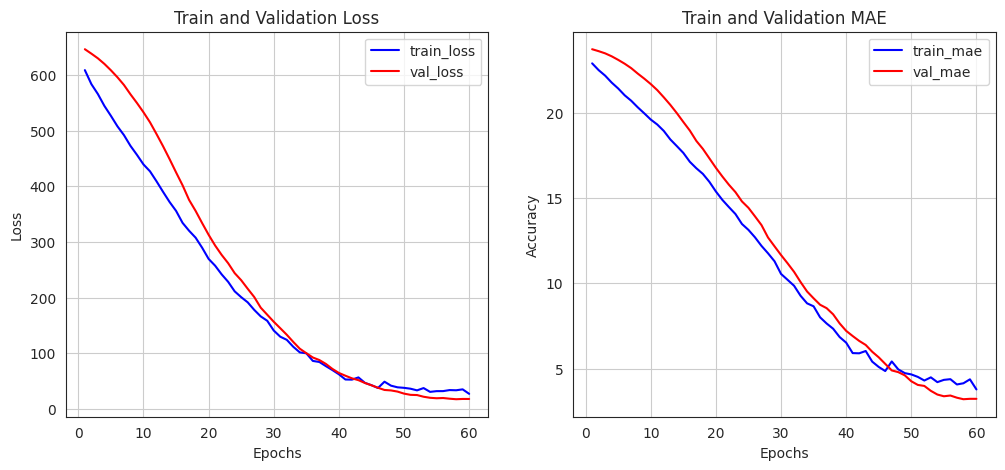

In [41]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

<br>
<br>

### 1.4 모델 평가 및 예측

In [47]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.1251 - mae: 3.5597 


[29.972599029541016, 3.804849147796631]

<br>
<br>
<br>

## 2. Reuters 딥러닝 모델

로이터 뉴스 기사 데이터셋으로, 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분된다. 뉴스 기사의 주제로 46개의 레이블이 있다.

### 2.1 데이터 로드 및 전처리

reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리한다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한한다(num_words=10000).
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용한다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력한다.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [67]:
# 데이터 로드: 단어 개수 10,000개로 제한
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# train/validation 분리 (25% → validation)
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42)

# 데이터셋 및 레이블 수 확인
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


<br>

텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행한다.  
레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환한다.

In [68]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

# 입력 데이터 원-핫 인코딩
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터 범주형(One-Hot) 변환
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

<br>
<br>

### 2.2 모델 구성 및 컴파일



BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성한다.

-  ELU는 음수 영역에서 정보 손실 없이 출력이 자연스럽게 감소하기 때문에 ReLU보다 더 부드럽고 안정적인 학습을 기대할 수 있다.
- tanh는 BatchNormalization과 같이 사용할 경우 상대적으로 기울기 소실 문제가 덜 발생할 수 있다.

In [61]:
"""
활성화 함수: ELU
"""
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

In [69]:
"""
활성화 함수: tanh
"""
# # 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# model = models.Sequential()
# model.add(layers.Input(shape=(10000,)))

# model.add(layers.Dense(128))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('tanh'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(64))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('tanh'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(46, activation='softmax'))

# model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

In [15]:
"""
활성화 함수: ReLU
"""
# # 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# model = models.Sequential()
# model.add(layers.Input(shape=(10000,)))

# model.add(layers.Dense(128))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(64))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(46, activation='softmax'))

# model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

In [70]:
# 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<br>
<br>

### 2.3 모델 학습

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행한다.

In [71]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('reuters_best_model.h5',
                                           save_best_only=True,
                                           monitor='val_loss')

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2438 - loss: 3.3835

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.2520 - loss: 3.3546 - val_accuracy: 0.5984 - val_loss: 2.8747
Epoch 2/100
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6014 - loss: 2.0118

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6094 - loss: 1.9732 - val_accuracy: 0.7320 - val_loss: 2.0695
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7147 - loss: 1.5352

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7157 - loss: 1.5316 - val_accuracy: 0.7560 - val_loss: 1.8008
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7697 - loss: 1.2754

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7705 - loss: 1.2718 - val_accuracy: 0.7711 - val_loss: 1.6921
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8102 - loss: 1.0632

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8108 - loss: 1.0611 - val_accuracy: 0.7827 - val_loss: 1.5981
Epoch 6/100
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8403 - loss: 0.9178

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8436 - loss: 0.9014 - val_accuracy: 0.7970 - val_loss: 1.4939
Epoch 7/100
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8644 - loss: 0.7810

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8676 - loss: 0.7751 - val_accuracy: 0.8037 - val_loss: 1.4018
Epoch 8/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8806 - loss: 0.6903

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8811 - loss: 0.6871 - val_accuracy: 0.8108 - val_loss: 1.3152
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8999 - loss: 0.5925

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9001 - loss: 0.5917 - val_accuracy: 0.8090 - val_loss: 1.2498
Epoch 10/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9062 - loss: 0.5540

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9074 - loss: 0.5481 - val_accuracy: 0.8117 - val_loss: 1.1798
Epoch 11/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9197 - loss: 0.4705

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9195 - loss: 0.4705 - val_accuracy: 0.8152 - val_loss: 1.1397
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9248 - loss: 0.4167

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9250 - loss: 0.4165 - val_accuracy: 0.8117 - val_loss: 1.1054
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9306 - loss: 0.3857

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9307 - loss: 0.3855 - val_accuracy: 0.8099 - val_loss: 1.0873
Epoch 14/100
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9388 - loss: 0.3789

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9397 - loss: 0.3736 - val_accuracy: 0.8148 - val_loss: 1.0509
Epoch 15/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9387 - loss: 0.3491

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9391 - loss: 0.3478 - val_accuracy: 0.8166 - val_loss: 1.0256
Epoch 16/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9452 - loss: 0.3085

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9451 - loss: 0.3080 - val_accuracy: 0.8170 - val_loss: 1.0183
Epoch 17/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9506 - loss: 0.2824

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9506 - loss: 0.2822 - val_accuracy: 0.8157 - val_loss: 1.0119
Epoch 18/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9493 - loss: 0.2749 - val_accuracy: 0.8134 - val_loss: 1.0272
Epoch 19/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9571 - loss: 0.2528 - val_accuracy: 0.8161 - val_loss: 1.0222
Epoch 20/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9569 - loss: 0.2412 - val_accuracy: 0.8152 - val_loss: 1.0367
Epoch 21/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9579 - loss: 0.2311 - val_accuracy: 0.8112 - val_loss: 1.0518
Epoch 22/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9610 - loss: 0.2274 - val_accuracy: 0.8152 - val_loss: 1.0633
Epoch 23/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9644 - loss: 0.2045 - val_accuracy: 0.8134 - val_loss: 1.0599
Epoch 24/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9625 - loss: 0.2017 - val_accuracy: 0.8143 

<br>

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화한다.

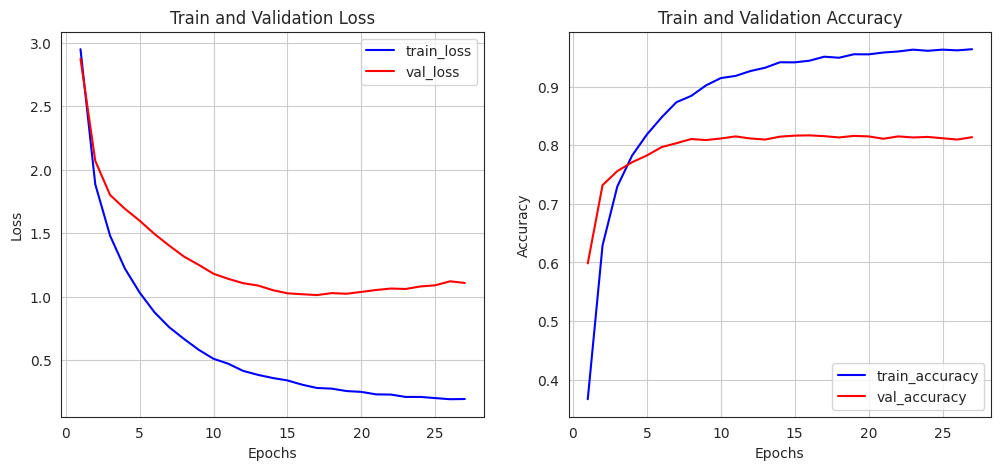

In [72]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

<br>
<br>

### 2.4 모델 평가 및 예측

테스트 데이터셋을 이용해 모델을 평가한다.

- 레이블을 to_categorical()로 변환했기 때문에
- model.evaluate()를 쓰기 위해서는 레이블 형태와 손실 함수가 일치해야 한다.

In [55]:
"""
활성화 함수: ELU
"""
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
from sklearn.metrics import classification_report
import numpy as np

# 모델 예측 (확률값 → 클래스 인덱스)
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 분류 지표 출력
print('Classification Report (Test Set):\n')
print(classification_report(y_true, y_pred, digits=4))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report (Test Set):

              precision    recall  f1-score   support

           0     0.9000    0.7500    0.8182        12
           1     0.6612    0.7619    0.7080       105
           2     0.7368    0.7000    0.7179        20
           3     0.9157    0.9348    0.9251       813
           4     0.8189    0.8776    0.8473       474
           5     0.0000    0.0000    0.0000         5
           6     0.8667    0.9286    0.8966        14
           7     1.0000    0.3333    0.5000         3
           8     0.6512    0.7368    0.6914        38
           9     0.8500    0.6800    0.7556        25
          10     0.8235    0.9333    0.8750        30
          11     0.5478    0.7590    0.6364        83
          12     0.3333    0.1538    0.2105        13
          13     0.5946    0.5946    0.5946        37
          14     0.0000    0.0000    0.0000         2
          15     0.5000    0.1111    0.1818         9
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
"""
활성화 함수: tanh
"""
# from sklearn.metrics import classification_report
# import numpy as np

# # 모델 예측 (확률값 → 클래스 인덱스)
# y_pred_probs = model.predict(x_test)
# y_pred = np.argmax(y_pred_probs, axis=1)
# y_true = np.argmax(y_test, axis=1)

# # 분류 지표 출력
# print('Classification Report (Test Set):\n')
# print(classification_report(y_true, y_pred, digits=4))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report (Test Set):

              precision    recall  f1-score   support

           0     0.9000    0.7500    0.8182        12
           1     0.5878    0.8286    0.6877       105
           2     0.7778    0.7000    0.7368        20
           3     0.9020    0.9397    0.9205       813
           4     0.8406    0.8565    0.8485       474
           5     0.0000    0.0000    0.0000         5
           6     0.8667    0.9286    0.8966        14
           7     1.0000    0.3333    0.5000         3
           8     0.7073    0.7632    0.7342        38
           9     0.8571    0.7200    0.7826        25
          10     0.8485    0.9333    0.8889        30
          11     0.5849    0.7470    0.6561        83
          12     0.4000    0.1538    0.2222        13
          13     0.5641    0.5946    0.5789        37
          14     1.0000    0.5000    0.6667         2
          15     0.5000    0.1111    0.1818         9
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
"""
활성화 함수: ReLU
"""
# from sklearn.metrics import classification_report
# import numpy as np

# # 모델 예측 (확률값 → 클래스 인덱스)
# y_pred_probs = model.predict(x_test)
# y_pred = np.argmax(y_pred_probs, axis=1)
# y_true = np.argmax(y_test, axis=1)

# # 분류 지표 출력
# print('Classification Report (Test Set):\n')
# print(classification_report(y_true, y_pred, digits=4))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report (Test Set):

              precision    recall  f1-score   support

           0     0.8889    0.6667    0.7619        12
           1     0.5592    0.8095    0.6615       105
           2     0.6842    0.6500    0.6667        20
           3     0.8845    0.9422    0.9124       813
           4     0.8330    0.8734    0.8527       474
           5     0.0000    0.0000    0.0000         5
           6     0.9231    0.8571    0.8889        14
           7     1.0000    0.3333    0.5000         3
           8     0.6170    0.7632    0.6824        38
           9     0.8571    0.7200    0.7826        25
          10     0.8333    0.8333    0.8333        30
          11     0.6087    0.6747    0.6400        83
          12     0.3333    0.1538    0.2105        13
          13     0.5882    0.5405    0.5634        37
          14     1.0000    0.5000    0.6667         2
          15     0.5000    0.1111    0.1818         9
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<br>
<br>
<br>

## 3. CIFAR10 딥러닝 모델

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있다.

### 3.1 데이터 로드 및 전처리

CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리한다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용한다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용한다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력한다.

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [51]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# CIFAR-10 데이터 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증용으로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

# 레이블은 2D → 1D로 변형
y_train = y_train.flatten()
y_val = y_val.flatten()
y_test = y_test.flatten()

print('전체 학습 데이터: {} 레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {} 레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {} 레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {} 레이블: {}'.format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000,)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000,)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000,)


<br>

class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담는다.

In [52]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<br>

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인한다.

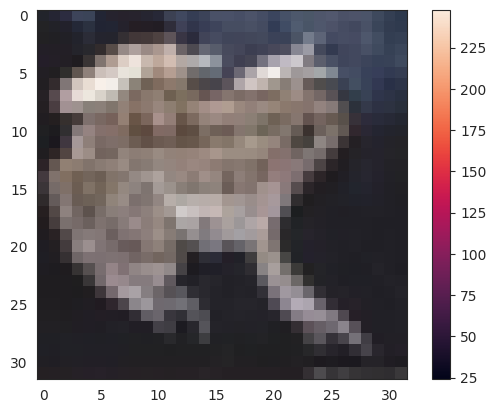

In [53]:
sns.set_style('white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [54]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


<br>

데이터의 형태를 변형하여 모델이 잘 학습할 수 있게 한다.

In [55]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [56]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

<br>
<br>

### 3.2 모델 구성 및 컴파일

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성한다.

In [57]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import utils

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [48]:
"""
옵티마이저: Adam
"""
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
"""
옵티마이저: SGD
"""
# # 컴파일
# model.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

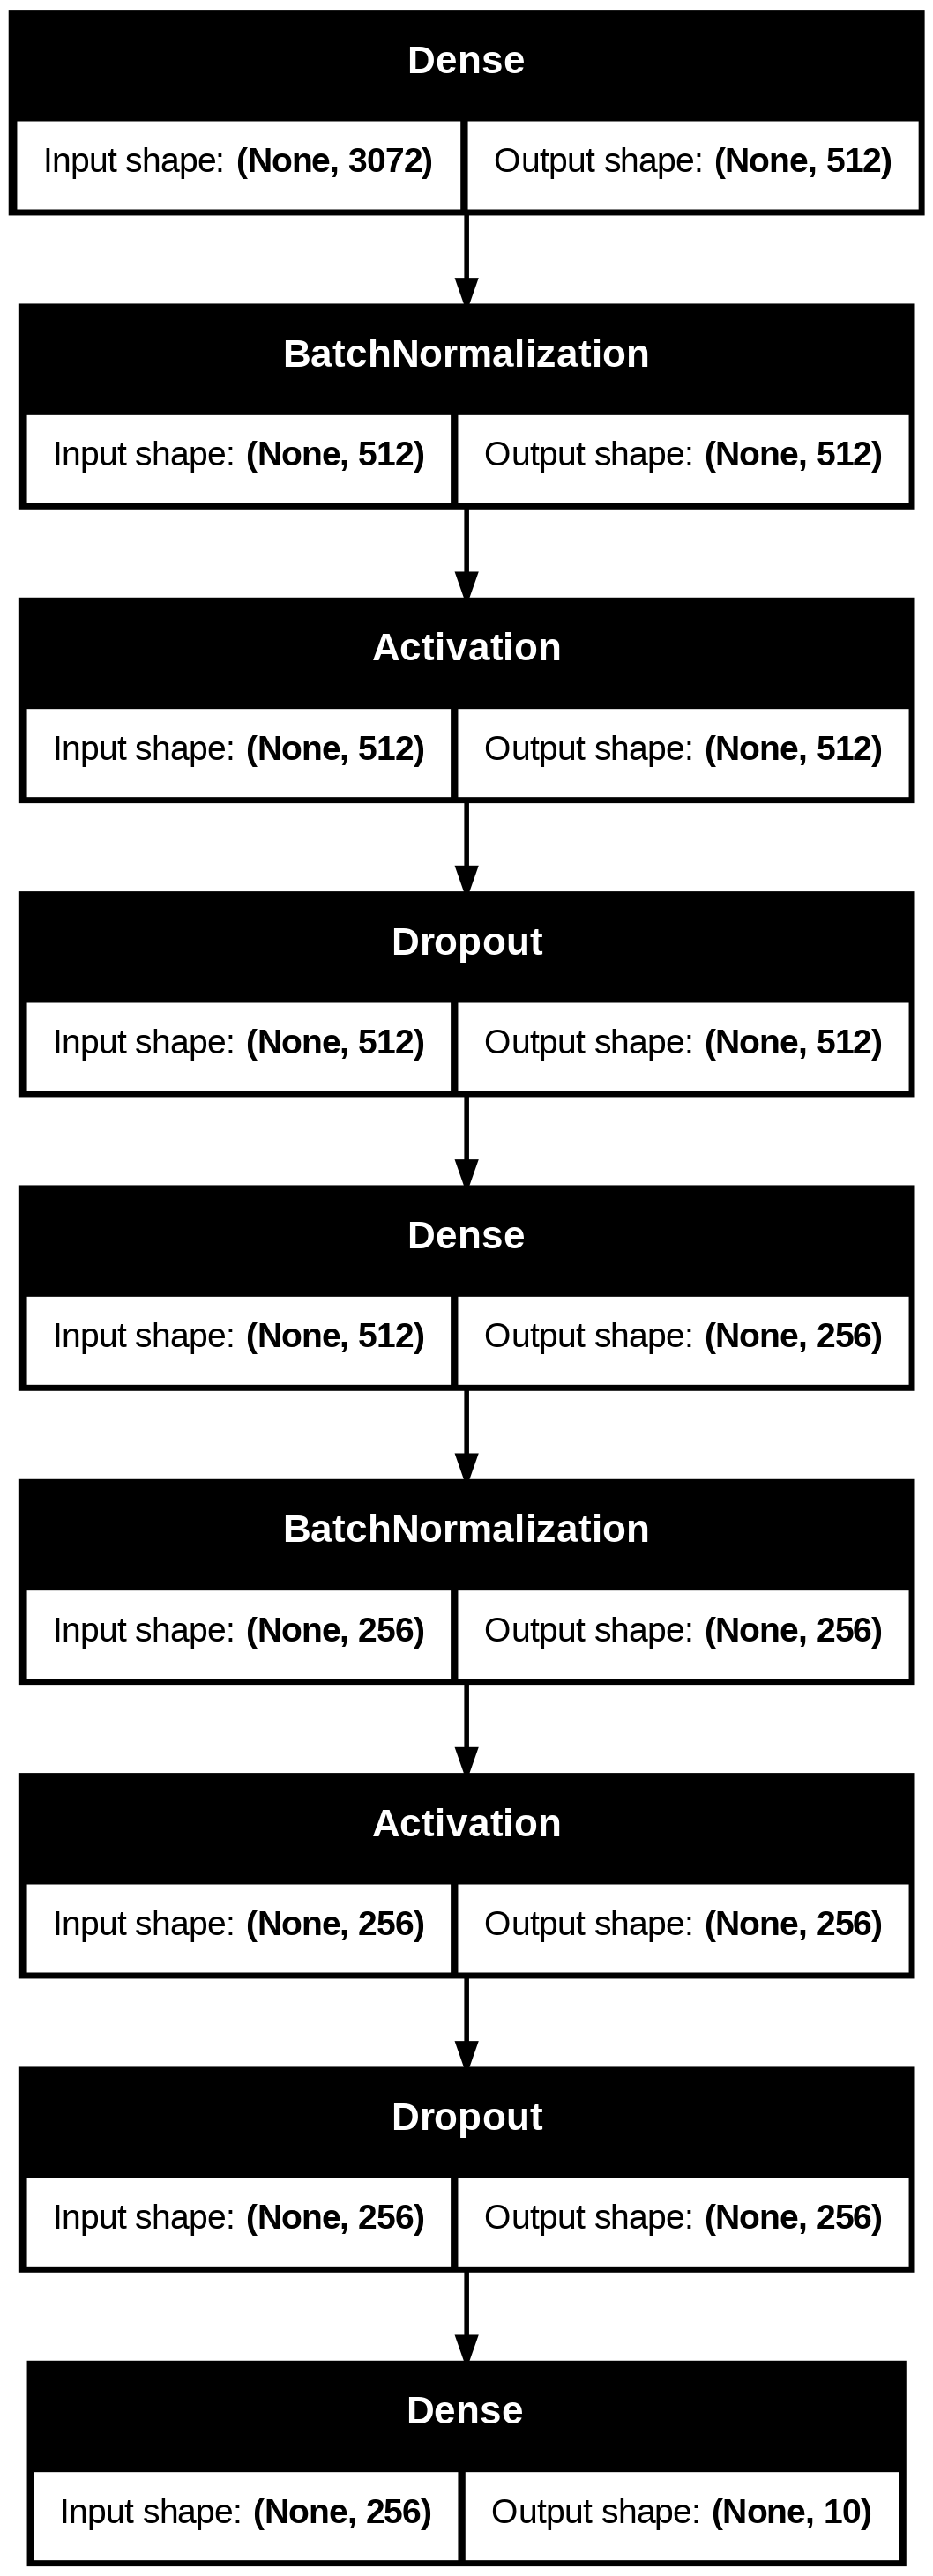

In [38]:
utils.plot_model(model, show_shapes=True)

<br>
<br>

### 3.3 모델 학습

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행한다.

In [49]:
"""
옵티마이저: Adam
"""
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10_best_model.h5',
                                           save_best_only=True,
                                           monitor='val_loss')

early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss',
                                            patience=10,
                                            restore_best_weights=True)

# 모델 학습
history_adam = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2562 - loss: 2.2543

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.2565 - loss: 2.2530 - val_accuracy: 0.3506 - val_loss: 1.8163
Epoch 2/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3689 - loss: 1.7650

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3692 - loss: 1.7640 - val_accuracy: 0.3784 - val_loss: 1.7418
Epoch 3/100
147/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4179 - loss: 1.6335

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4181 - loss: 1.6328 - val_accuracy: 0.3813 - val_loss: 1.7079
Epoch 4/100
147/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4399 - loss: 1.5659

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4403 - loss: 1.5657 - val_accuracy: 0.4218 - val_loss: 1.6271
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4574 - loss: 1.5170 - val_accuracy: 0.4192 - val_loss: 1.6327
Epoch 6/100
149/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4690 - loss: 1.4757

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4690 - loss: 1.4760 - val_accuracy: 0.4451 - val_loss: 1.5734
Epoch 7/100
148/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4796 - loss: 1.4582

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4798 - loss: 1.4579 - val_accuracy: 0.4562 - val_loss: 1.5298
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4935 - loss: 1.4150 - val_accuracy: 0.4499 - val_loss: 1.5825
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5024 - loss: 1.4067 - val_accuracy: 0.4602 - val_loss: 1.5481
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5081 - loss: 1.3799 - val_accuracy: 0.4506 - val_loss: 1.5554
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5168 - loss: 1.3591 - val_accuracy: 0.4758 - val_loss: 1.5368
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5199 - loss: 1.3339 - val_accuracy: 0.4115 - val_loss: 1.6175
Epoch 13/100
145/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5252 - loss: 1.3291

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5253 - loss: 1.3288 - val_accuracy: 0.4924 - val_loss: 1.4786
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5329 - loss: 1.3063 - val_accuracy: 0.4839 - val_loss: 1.4848
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5371 - loss: 1.2954 - val_accuracy: 0.4389 - val_loss: 1.5844
Epoch 16/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5416 - loss: 1.2781 - val_accuracy: 0.4280 - val_loss: 1.5513
Epoch 17/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5445 - loss: 1.2581 - val_accuracy: 0.4152 - val_loss: 1.6225
Epoch 18/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5558 - loss: 1.2411 - val_accuracy: 0.4534 - val_loss: 1.5032
Epoch 19/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5575 - loss: 1.2374 - val_accuracy: 0.4715 - val_loss: 1.4938
Epoch 20/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5701 - loss: 1.2162

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5701 - loss: 1.2162 - val_accuracy: 0.4620 - val_loss: 1.4762
Epoch 21/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5725 - loss: 1.2014 - val_accuracy: 0.4676 - val_loss: 1.5221
Epoch 22/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5739 - loss: 1.1913

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5739 - loss: 1.1914 - val_accuracy: 0.4916 - val_loss: 1.4391
Epoch 23/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5788 - loss: 1.1767 - val_accuracy: 0.4223 - val_loss: 1.5744
Epoch 24/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5838 - loss: 1.1641 - val_accuracy: 0.4947 - val_loss: 1.4420
Epoch 25/100
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5846 - loss: 1.1558

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5847 - loss: 1.1558 - val_accuracy: 0.4904 - val_loss: 1.4339
Epoch 26/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5942 - loss: 1.1356 - val_accuracy: 0.4595 - val_loss: 1.5072
Epoch 27/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5943 - loss: 1.1267 - val_accuracy: 0.4841 - val_loss: 1.4410
Epoch 28/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5988 - loss: 1.1197 - val_accuracy: 0.4824 - val_loss: 1.4409
Epoch 29/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6103 - loss: 1.0909

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6102 - loss: 1.0910 - val_accuracy: 0.4880 - val_loss: 1.4175
Epoch 30/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6054 - loss: 1.0979 - val_accuracy: 0.4528 - val_loss: 1.5148
Epoch 31/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6131 - loss: 1.0789 - val_accuracy: 0.4841 - val_loss: 1.4392
Epoch 32/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6146 - loss: 1.0682 - val_accuracy: 0.4851 - val_loss: 1.4498
Epoch 33/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6202 - loss: 1.0631 - val_accuracy: 0.4516 - val_loss: 1.4976
Epoch 34/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6226 - loss: 1.0547 - val_accuracy: 0.4413 - val_loss: 1.5287
Epoch 35/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6274 - loss: 1.0394 - val_accuracy: 0.4771 - val_loss: 1.4680
Epoch 36/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6328 - loss: 1.0318 - val_accuracy:

In [59]:
"""
옵티마이저: SGD
"""
# from tensorflow.keras import callbacks

# check_point_cb = callbacks.ModelCheckpoint('cifar10_best_model.h5',
#                                            save_best_only=True,
#                                            monitor='val_loss')

# early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss',
#                                             patience=10,
#                                             restore_best_weights=True)

# # 모델 학습
# history_sgd = model.fit(x_train, y_train,
#                     epochs=100,
#                     batch_size=256,
#                     validation_data=(x_val, y_val),
#                     callbacks=[check_point_cb, early_stopping_cb],
#                     verbose=1)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1725 - loss: 2.5800

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1727 - loss: 2.5790 - val_accuracy: 0.3020 - val_loss: 1.9806
Epoch 2/100
148/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2598 - loss: 2.1881

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2602 - loss: 2.1859 - val_accuracy: 0.3783 - val_loss: 1.7846
Epoch 3/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2962 - loss: 2.0571

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2963 - loss: 2.0566 - val_accuracy: 0.3915 - val_loss: 1.7234
Epoch 4/100
146/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3164 - loss: 1.9696

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3167 - loss: 1.9684 - val_accuracy: 0.4048 - val_loss: 1.6856
Epoch 5/100
145/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3345 - loss: 1.9100

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3345 - loss: 1.9092 - val_accuracy: 0.4196 - val_loss: 1.6574
Epoch 6/100
149/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3436 - loss: 1.8582

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3437 - loss: 1.8580 - val_accuracy: 0.4274 - val_loss: 1.6387
Epoch 7/100
148/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3557 - loss: 1.8273

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3558 - loss: 1.8270 - val_accuracy: 0.4304 - val_loss: 1.6164
Epoch 8/100
150/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3583 - loss: 1.8031

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3584 - loss: 1.8028 - val_accuracy: 0.4383 - val_loss: 1.6102
Epoch 9/100
152/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3676 - loss: 1.7651

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3677 - loss: 1.7650 - val_accuracy: 0.4380 - val_loss: 1.5928
Epoch 10/100
152/157 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3779 - loss: 1.7512

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3781 - loss: 1.7510 - val_accuracy: 0.4481 - val_loss: 1.5872
Epoch 11/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3892 - loss: 1.7192

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3891 - loss: 1.7193 - val_accuracy: 0.4453 - val_loss: 1.5758
Epoch 12/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3955 - loss: 1.7038

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3954 - loss: 1.7039 - val_accuracy: 0.4497 - val_loss: 1.5675
Epoch 13/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3988 - loss: 1.6811

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3988 - loss: 1.6813 - val_accuracy: 0.4542 - val_loss: 1.5609
Epoch 14/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3971 - loss: 1.6782

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3973 - loss: 1.6781 - val_accuracy: 0.4574 - val_loss: 1.5504
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4055 - loss: 1.6610

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4055 - loss: 1.6611 - val_accuracy: 0.4584 - val_loss: 1.5502
Epoch 16/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4049 - loss: 1.6563

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4050 - loss: 1.6562 - val_accuracy: 0.4634 - val_loss: 1.5392
Epoch 17/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4130 - loss: 1.6450 - val_accuracy: 0.4600 - val_loss: 1.5396
Epoch 18/100
146/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4174 - loss: 1.6333

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4173 - loss: 1.6334 - val_accuracy: 0.4642 - val_loss: 1.5266
Epoch 19/100
144/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4177 - loss: 1.6371

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4182 - loss: 1.6361 - val_accuracy: 0.4709 - val_loss: 1.5168
Epoch 20/100
144/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4225 - loss: 1.6202

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4225 - loss: 1.6200 - val_accuracy: 0.4715 - val_loss: 1.5093
Epoch 21/100
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4249 - loss: 1.6153

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4250 - loss: 1.6151 - val_accuracy: 0.4709 - val_loss: 1.5052
Epoch 22/100
147/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4275 - loss: 1.6038

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4276 - loss: 1.6038 - val_accuracy: 0.4732 - val_loss: 1.5049
Epoch 23/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4299 - loss: 1.6040

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4299 - loss: 1.6040 - val_accuracy: 0.4744 - val_loss: 1.4979
Epoch 24/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4371 - loss: 1.5863 - val_accuracy: 0.4633 - val_loss: 1.5054
Epoch 25/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4311 - loss: 1.5888 - val_accuracy: 0.4653 - val_loss: 1.5085
Epoch 26/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4299 - loss: 1.5870

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4299 - loss: 1.5869 - val_accuracy: 0.4771 - val_loss: 1.4874
Epoch 27/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4385 - loss: 1.5683

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4385 - loss: 1.5683 - val_accuracy: 0.4834 - val_loss: 1.4785
Epoch 28/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4405 - loss: 1.5662 - val_accuracy: 0.4757 - val_loss: 1.4806
Epoch 29/100
147/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4457 - loss: 1.5566

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4457 - loss: 1.5566 - val_accuracy: 0.4846 - val_loss: 1.4733
Epoch 30/100
146/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4477 - loss: 1.5434

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4479 - loss: 1.5437 - val_accuracy: 0.4855 - val_loss: 1.4725
Epoch 31/100
148/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4463 - loss: 1.5412

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4463 - loss: 1.5416 - val_accuracy: 0.4828 - val_loss: 1.4687
Epoch 32/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4491 - loss: 1.5457

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4491 - loss: 1.5457 - val_accuracy: 0.4878 - val_loss: 1.4671
Epoch 33/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4534 - loss: 1.5363

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4534 - loss: 1.5363 - val_accuracy: 0.4837 - val_loss: 1.4574
Epoch 34/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4518 - loss: 1.5382 - val_accuracy: 0.4839 - val_loss: 1.4619
Epoch 35/100
145/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4523 - loss: 1.5232

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4522 - loss: 1.5237 - val_accuracy: 0.4880 - val_loss: 1.4503
Epoch 36/100
147/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4584 - loss: 1.5240

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4584 - loss: 1.5238 - val_accuracy: 0.4913 - val_loss: 1.4470
Epoch 37/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4556 - loss: 1.5196

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4557 - loss: 1.5195 - val_accuracy: 0.4954 - val_loss: 1.4446
Epoch 38/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4511 - loss: 1.5254 - val_accuracy: 0.4824 - val_loss: 1.4581
Epoch 39/100
145/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4612 - loss: 1.5044

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4610 - loss: 1.5050 - val_accuracy: 0.4929 - val_loss: 1.4389
Epoch 40/100
146/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4636 - loss: 1.4999

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4634 - loss: 1.5005 - val_accuracy: 0.4959 - val_loss: 1.4367
Epoch 41/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4660 - loss: 1.5014 - val_accuracy: 0.4871 - val_loss: 1.4451
Epoch 42/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4608 - loss: 1.5030 - val_accuracy: 0.4884 - val_loss: 1.4418
Epoch 43/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4620 - loss: 1.4988

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4620 - loss: 1.4987 - val_accuracy: 0.4930 - val_loss: 1.4315
Epoch 44/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4717 - loss: 1.4838

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4716 - loss: 1.4840 - val_accuracy: 0.5030 - val_loss: 1.4287
Epoch 45/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4682 - loss: 1.4881 - val_accuracy: 0.4926 - val_loss: 1.4341
Epoch 46/100
149/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4734 - loss: 1.4716

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4734 - loss: 1.4720 - val_accuracy: 0.5029 - val_loss: 1.4167
Epoch 47/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4685 - loss: 1.4811 - val_accuracy: 0.4952 - val_loss: 1.4221
Epoch 48/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4700 - loss: 1.4805 - val_accuracy: 0.4774 - val_loss: 1.4586
Epoch 49/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4690 - loss: 1.4744 - val_accuracy: 0.4987 - val_loss: 1.4174
Epoch 50/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4792 - loss: 1.4618

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4792 - loss: 1.4618 - val_accuracy: 0.5025 - val_loss: 1.4165
Epoch 51/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4779 - loss: 1.4602

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4779 - loss: 1.4602 - val_accuracy: 0.5031 - val_loss: 1.4142
Epoch 52/100
144/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4775 - loss: 1.4568

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4775 - loss: 1.4568 - val_accuracy: 0.5052 - val_loss: 1.4062
Epoch 53/100
145/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4721 - loss: 1.4648

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4724 - loss: 1.4644 - val_accuracy: 0.5089 - val_loss: 1.4055
Epoch 54/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4795 - loss: 1.4594 - val_accuracy: 0.5032 - val_loss: 1.4130
Epoch 55/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4844 - loss: 1.4487 - val_accuracy: 0.5077 - val_loss: 1.4059
Epoch 56/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4805 - loss: 1.4446 - val_accuracy: 0.4989 - val_loss: 1.4083
Epoch 57/100
144/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4832 - loss: 1.4431

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4831 - loss: 1.4429 - val_accuracy: 0.5107 - val_loss: 1.3958
Epoch 58/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4821 - loss: 1.4369 - val_accuracy: 0.5081 - val_loss: 1.3968
Epoch 59/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4841 - loss: 1.4362

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4841 - loss: 1.4362 - val_accuracy: 0.5078 - val_loss: 1.3926
Epoch 60/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4877 - loss: 1.4236 - val_accuracy: 0.5103 - val_loss: 1.3956
Epoch 61/100
146/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4888 - loss: 1.4276

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4888 - loss: 1.4275 - val_accuracy: 0.5071 - val_loss: 1.3859
Epoch 62/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4894 - loss: 1.4273 - val_accuracy: 0.5023 - val_loss: 1.4156
Epoch 63/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4889 - loss: 1.4248 - val_accuracy: 0.5108 - val_loss: 1.3868
Epoch 64/100
147/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4971 - loss: 1.4118

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4968 - loss: 1.4123 - val_accuracy: 0.5143 - val_loss: 1.3793
Epoch 65/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4895 - loss: 1.4233 - val_accuracy: 0.5129 - val_loss: 1.3794
Epoch 66/100
149/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4926 - loss: 1.4143

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4927 - loss: 1.4143 - val_accuracy: 0.5182 - val_loss: 1.3738
Epoch 67/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5035 - loss: 1.3971 - val_accuracy: 0.5059 - val_loss: 1.3808
Epoch 68/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4999 - loss: 1.3962 - val_accuracy: 0.4963 - val_loss: 1.3978
Epoch 69/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4986 - loss: 1.3985 - val_accuracy: 0.5063 - val_loss: 1.4043
Epoch 70/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4986 - loss: 1.4013 - val_accuracy: 0.5110 - val_loss: 1.3767
Epoch 71/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5019 - loss: 1.3960 - val_accuracy: 0.5164 - val_loss: 1.3771
Epoch 72/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4957 - loss: 1.3971

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4958 - loss: 1.3970 - val_accuracy: 0.5191 - val_loss: 1.3696
Epoch 73/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4942 - loss: 1.3968

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4943 - loss: 1.3967 - val_accuracy: 0.5186 - val_loss: 1.3609
Epoch 74/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5014 - loss: 1.3886 - val_accuracy: 0.5123 - val_loss: 1.3708
Epoch 75/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5060 - loss: 1.3781 - val_accuracy: 0.5148 - val_loss: 1.3756
Epoch 76/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5033 - loss: 1.3931 - val_accuracy: 0.5128 - val_loss: 1.3664
Epoch 77/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5083 - loss: 1.3703 - val_accuracy: 0.5090 - val_loss: 1.3754
Epoch 78/100
148/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5112 - loss: 1.3697

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5111 - loss: 1.3698 - val_accuracy: 0.5206 - val_loss: 1.3549
Epoch 79/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5072 - loss: 1.3693 - val_accuracy: 0.5123 - val_loss: 1.3790
Epoch 80/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5064 - loss: 1.3711 - val_accuracy: 0.5188 - val_loss: 1.3576
Epoch 81/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5111 - loss: 1.3739 - val_accuracy: 0.5166 - val_loss: 1.3580
Epoch 82/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5100 - loss: 1.3735 - val_accuracy: 0.5198 - val_loss: 1.3551
Epoch 83/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5083 - loss: 1.3585 - val_accuracy: 0.5179 - val_loss: 1.3585
Epoch 84/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5156 - loss: 1.3494 - val_accuracy: 0.5153 - val_loss: 1.3664
Epoch 85/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5142 - loss: 1.3432

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5141 - loss: 1.3435 - val_accuracy: 0.5229 - val_loss: 1.3502
Epoch 86/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5099 - loss: 1.3581 - val_accuracy: 0.5202 - val_loss: 1.3540
Epoch 87/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5149 - loss: 1.3501 - val_accuracy: 0.5122 - val_loss: 1.3723
Epoch 88/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5208 - loss: 1.3396 - val_accuracy: 0.4999 - val_loss: 1.4423
Epoch 89/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5224 - loss: 1.3398

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5224 - loss: 1.3398 - val_accuracy: 0.5229 - val_loss: 1.3497
Epoch 90/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5182 - loss: 1.3330 - val_accuracy: 0.5135 - val_loss: 1.3688
Epoch 91/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5243 - loss: 1.3340 - val_accuracy: 0.5231 - val_loss: 1.3573
Epoch 92/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5225 - loss: 1.3322 - val_accuracy: 0.4824 - val_loss: 1.4634
Epoch 93/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 1.3349

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5204 - loss: 1.3350 - val_accuracy: 0.5262 - val_loss: 1.3413
Epoch 94/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5238 - loss: 1.3288 - val_accuracy: 0.5148 - val_loss: 1.3584
Epoch 95/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5209 - loss: 1.3325 - val_accuracy: 0.4855 - val_loss: 1.4326
Epoch 96/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5207 - loss: 1.3253 - val_accuracy: 0.5172 - val_loss: 1.3473
Epoch 97/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5232 - loss: 1.3218 - val_accuracy: 0.5145 - val_loss: 1.3699
Epoch 98/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5288 - loss: 1.3256

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5288 - loss: 1.3255 - val_accuracy: 0.5285 - val_loss: 1.3363
Epoch 99/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5259 - loss: 1.3132

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5259 - loss: 1.3133 - val_accuracy: 0.5235 - val_loss: 1.3352
Epoch 100/100
149/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5317 - loss: 1.3087

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5315 - loss: 1.3090 - val_accuracy: 0.5263 - val_loss: 1.3300


<br>

Adam vs SGD로 학습 시 val_loss 시각화
- 동일한 모델 구조와 학습 조건에서 옵티마이저만 Adam과 SGD로 바꾸어 학습한 후,
각 epoch에서의 Validation Loss(val_loss) 변화를 시각화한다.

In [60]:
import matplotlib.pyplot as plt

def plot_val_loss(history_adam, history_sgd):
    plt.figure(figsize=(10, 5))

    # Adam의 val_loss
    plt.plot(history_adam.history['val_loss'], label='Adam - val_loss', color='blue')

    # SGD의 val_loss
    plt.plot(history_sgd.history['val_loss'], label='SGD - val_loss', color='orange')

    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title('EarlyStopping Behavior: Adam vs SGD')
    plt.legend()
    plt.grid(True)
    plt.show()

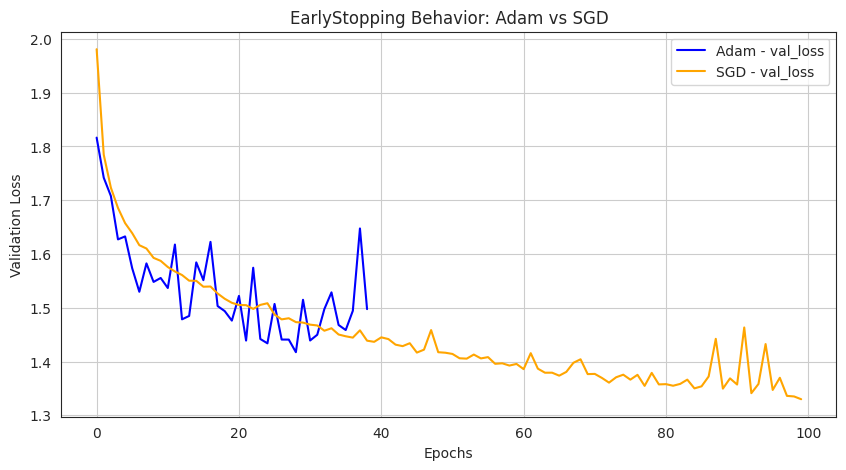

In [61]:
plot_val_loss(history_adam, history_sgd)

<br>

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화한다.

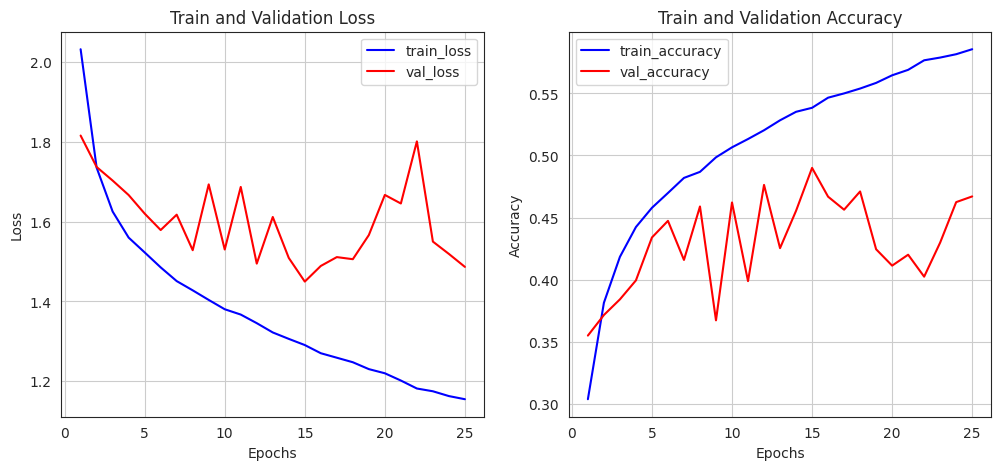

In [32]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history_adam.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

<br>
<br>

### 3.4 모델 평가 및 예측

In [33]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4962 - loss: 1.4492


[1.4507044553756714, 0.49230000376701355]